In [1]:
import numpy as np
#from hoj_hermite import *
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import eval_hermite
from scipy.misc import factorial
def hermite_function(n,x):
    return eval_hermite(n,x) * np.exp( - x**2 / 2) / ( 2**(n/2.) * np.sqrt(factorial(n))) * (np.pi)**0.25
    

Let us do a one-dimensional example first.  We should be able to compute the $k$th coefficient of a function to a good approximation using Gaussian quadrature.

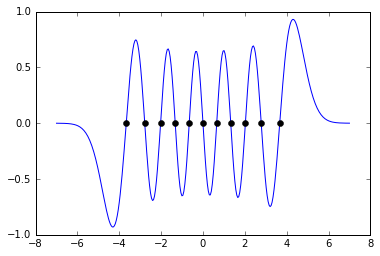

In [2]:
N = 10
nodes , weights = np.polynomial.hermite.hermgauss(N+1)
x = np.linspace(-7,7,300)
y = hermite_function(N+1,x)
plt.plot(x,y,'b')
plt.plot(nodes,np.zeros(N+1),'ko')
plt.show()
C = np.zeros(N+1)
for n in range(N+1):
    C += hermite_function(n,nodes)**2

Now let us apply formula (2.10) of [Tang 93] to obtain the Hermite function coefficients of an indicator function.
$a_n = \sum_{j=0}^{N} \frac{1}{C_j}f(\gamma_j /\alpha)h_n(\gamma_j)$ where $\alpha = \sqrt{2N} / M$
and $C_j = \sum_{n=0}^N [\psi_n(\gamma_j)]^2$

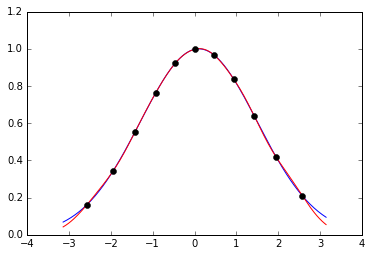

In [7]:
M = np.pi
f = lambda x: np.exp( - (x-0.1)**2 / (2*1.4**2)) #1.5**2-(x)**2 if np.abs(x) < 1.5 else 0. 
alpha = np.sqrt(2.*N) / M
y = map(f, nodes / alpha)
a = np.array( [ sum(y * hermite_function(n, nodes) / C) for n in range(N+1)] )

x = np.linspace(-M,M,200)
f_exact = map(f,x)
f_N = sum( a[n] * hermite_function(n,alpha*x) for n in range(N+1))

plt.plot(x , f_exact, 'b')
plt.plot(x , f_N , 'r')
plt.plot(nodes/alpha ,  map(f,nodes/alpha) , 'ko')
plt.show()    

Now let's see what the callocation basis should look like.  This is the basis such that $E_i(\gamma_j / \alpha) = \delta_{ij}$ where $\gamma_0,\dots,\gamma_n$ denote the Gaussian quadrature nodes.  According to formula (2.10) of [Tang 93], this basis is given explicitly by $E_i(x) = a_n h_n(\alpha x)$ where $a_n = \sum_{i=0}^N h_n( \gamma_i) / C_i$ and $C_i = \sum_{n=0}^N \psi_n(\gamma_i)^2$.
Let us think view this as a pre-computation.  Our support constraint will be obtained by requiring $\psi_T(x) = \sum_{n=0}^N \beta_n E_n(x)$ with $\beta_n = 0$ for $\gamma_n/\alpha \notin X_T$.

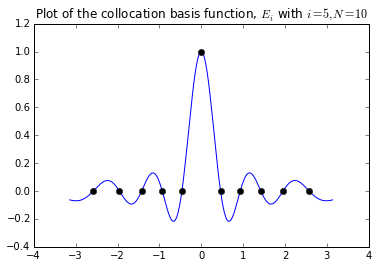

In [23]:
i = (N+1)/2
a = np.array( [ hermite_function(n, nodes[i]) / C[i] for n in range(N+1)] )
y = sum( a[n]*hermite_function(n,alpha*x) for n in range(N+1))
plt.plot(x,y,'b')
ei = np.zeros(N+1)
ei[i] =1.
plt.plot(nodes/alpha, ei,'ko')
plt.title('Plot of the collocation basis function, $E_i$ with $i={:d}, N = {:d}$'.format(i,N))
plt.show()

[Tang 93] T. Tang, *The Hermite Spectral Method for Gaussian-Type Functions*, SIAM J. Sci. Comput., 14(3), p.594-606 (1993)